In [2]:
import damask
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

filename = "../IMI817_100um_tensionY.hdf5"
output_comparision_fig_name = "TRY-18.png"
Changed_from_base = "Use True Stress and True Strain from experimental Data"

In [3]:
help(damask.Result)

Help on class Result in module damask._result:

class Result(builtins.object)
 |  Result(fname: Union[str, pathlib.Path])
 |  
 |  Add data to and export data from a DADF5 file.
 |  
 |  A DADF5 (DAMASK HDF5) file contains DAMASK results.
 |  Its group/folder structure reflects the layout in material.yaml.
 |  
 |  This class provides a customizable view on the DADF5 file.
 |  Upon initialization, all attributes are visible.
 |  Derived quantities are added to the file and existing data is
 |  exported based on the current view.
 |  
 |  Examples
 |  --------
 |  Open 'my_file.hdf5', which is assumed to contain deformation gradient 'F'
 |  and first Piola-Kirchhoff stress 'P', add the Mises equivalent of the
 |  Cauchy stress, and export it to VTK (file) and numpy.ndarray (memory).
 |  
 |  >>> import damask
 |  >>> r = damask.Result('my_file.hdf5')
 |  >>> r.add_stress_Cauchy()
 |  >>> r.add_equivalent_Mises('sigma')
 |  >>> r.export_VTK()
 |  >>> r_last = r.view(increments=-1)
 |  >>

In [4]:
result = damask.Result(filename)
result.add_stress_Cauchy()
result.add_strain()
result.add_equivalent_Mises('sigma')
result.add_equivalent_Mises('epsilon_V^0.0(F)')
result.add_IPF_color([0, 0, 1])
result

 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00


Created by DAMASK_grid v3.0.0-alpha7
        on 2023-03-30 14:51:25+0530
 executing "DAMASK_grid --load tensionY.yaml --geom IMI817_100um.vti"

increment_0 (0.0 s)
  phase
    IMI817
      mechanical
        F / 1: deformation gradient
        F_e / 1: elastic deformation gradient
        F_p / 1: plastic deformation gradient
        IPFcolor_(0 0 1) / 8-bit RGB: Inverse Pole Figure (IPF) colors along sample direction (0 0 1)
        L_p / 1/s: plastic velocity gradient
        O / q_0 (q_1 q_2 q_3): crystal orientation as quaternion
        P / Pa: first Piola-Kirchhoff stress
        epsilon_V^0.0(F) / 1: strain tensor of F (deformation gradient)
        epsilon_V^0.0(F)_vM / 1: Mises equivalent strain of epsilon_V^0.0(F) (strain tensor of F (deformation gradient))
        gamma_sl / 1: plastic shear
        sigma / Pa: Cauchy stress calculated from P (first Piola-Kirchhoff stress) and F (deformation gradient)
        sigma_vM / Pa: Mises equivalent stress of sigma (Cauchy stress cal

In [ ]:
result.export_VTK()
# exporting as VTK file for visualization in ParaView

In [ ]:
import os
import shutil
vti_files = [file for file in os.listdir() if '.vti' in file]
# vti_files
os.mkdir("../result_vti")
for file in vti_files:
    new_path = "../result_vti/" + file
    shutil.move(file, new_path)


In [5]:
increments_list = result.increments_in_range()
print(increments_list)
timesteps = result.times_in_range()
timesteps

[0, 8, 16, 24, 32, 40, 48, 56, 64, 72, 80, 88, 96, 104, 112, 120, 128, 136, 144, 152, 160, 168, 176, 184, 192, 200, 208, 216, 224, 232, 240, 248, 256, 264, 272, 280, 288, 296, 304, 312, 320, 328, 336, 344, 352, 360, 368, 376, 384, 392, 400, 408, 416, 424, 432, 440, 448, 456, 464, 472, 480, 488, 496, 504, 512, 520, 528, 536, 544, 552, 560, 568, 576, 584, 592, 600, 608, 616, 624, 632, 640, 648, 656, 664, 672, 680, 688, 696]


[0.0,
 0.4,
 0.8,
 1.2,
 1.6,
 2.0,
 2.4,
 2.8,
 3.2,
 3.6,
 4.0,
 4.4,
 4.8,
 5.2,
 5.6,
 6.0,
 6.4,
 6.8,
 7.2,
 7.6,
 8.0,
 8.8,
 9.6,
 10.4,
 11.2,
 12.0,
 12.8,
 13.6,
 14.4,
 15.2,
 16.0,
 16.8,
 17.6,
 18.4,
 19.2,
 20.0,
 20.8,
 21.6,
 22.4,
 23.2,
 24.0,
 24.8,
 25.6,
 26.4,
 27.2,
 28.0,
 28.8,
 29.6,
 30.4,
 31.2,
 32.0,
 32.8,
 33.6,
 34.4,
 35.2,
 36.0,
 36.8,
 37.6,
 38.4,
 39.2,
 40.0,
 40.8,
 41.6,
 42.4,
 43.2,
 44.0,
 44.8,
 45.6,
 46.4,
 47.2,
 48.0,
 48.8,
 49.6,
 50.4,
 51.2,
 52.0,
 52.8,
 53.6,
 54.4,
 55.200000000001,
 56.000000000001,
 56.800000000001,
 57.600000000001,
 58.400000000001,
 59.200000000001,
 60.000000000001,
 60.800000000001,
 61.600000000001]

In [6]:
average_stress_dict = {}
average_strain_dict = {}
for index in increments_list:
    cur_result = result.view(increments = index)
    cur_sigma_array = cur_result.get("sigma_vM")
    cur_epsilon_array = cur_result.get('epsilon_V^0.0(F)_vM')
    average_stress_dict[index] = np.average(cur_sigma_array)
    average_strain_dict[index] = np.average(cur_epsilon_array)
    
print(average_stress_dict, "\n", average_strain_dict)

{0: 4.0055041496648255e-05, 8: 46032602.33498531, 16: 92140286.99299218, 24: 138323129.2024298, 32: 184581214.90907907, 40: 230914627.71340528, 48: 277323451.30616754, 56: 323807717.77213585, 64: 370366204.7946471, 72: 416985341.6829134, 80: 463553568.37571895, 88: 509392187.55538464, 96: 551984310.8647969, 104: 587391903.3122771, 112: 614638816.016562, 120: 636209672.3272254, 128: 654671618.5454028, 136: 671190487.8029618, 144: 685945121.8185253, 152: 698911705.5706589, 160: 710243955.5604495, 168: 729122824.9527997, 176: 744990270.0401719, 184: 759137875.8632071, 192: 772174048.1601732, 200: 784386609.8768513, 208: 795930767.488441, 216: 806885102.4746531, 224: 817294620.4807798, 232: 827197996.0849235, 240: 836636823.2902669, 248: 845657207.5050466, 256: 854303007.4279146, 264: 862608650.0717803, 272: 870599603.3909647, 280: 878295844.6029578, 288: 885714781.2306883, 296: 892873192.1292799, 304: 899788348.1757312, 312: 906478404.1750761, 320: 912961070.765329, 328: 919251582.5359232

In [7]:
xval = [strain for strain in average_strain_dict.values()]
yval = [stress/(10**6) for stress in average_stress_dict.values()]
# plt.figure()
# plt.plot(xval, yval)
# plt.title(f"Stress Vs. Strain for {filename[3:-5]}")
# plt.xlabel("Strain")
# plt.ylabel("Stress [MPa]")
# plt.savefig(f"../SigmaVSepsilonfor{filename[3:-5]}.png", bbox_inches='tight', dpi=128)

# plt.figure()
# plt.plot(timesteps, xval)
# plt.title(f"Strain vs Time(s)")
# plt.xlabel("Time (s)")
# plt.ylabel("Strain")
# plt.savefig(f"../StrainVsTimeFor{filename[3:-5]}.png", bbox_inches="tight", dpi=128)

# plt.figure()
# plt.plot(timesteps, yval)
# plt.title("Stress vs Time")
# plt.xlabel("Time (s)")
# plt.ylabel("Stress (MPa)")
# plt.savefig(f"../StressVsTimeFor{filename[3:-5]}.png", bbox_inches='tight', dpi=128)

In [8]:
# Summarising some datas
with open("maximum_stress.txt", "a") as record:
    record.write(str(max(yval)) + "\n")
with open("maximum_stress.txt", "r") as record:
    data = record.readlines()
data

['1114.0822273447802\n',
 '1114.073265133055\n',
 '1125.5447759048643\n',
 '1114.0836421156512\n',
 '1091.6869290082543\n',
 '1091.6869290082543\n',
 '1091.6869290082543\n',
 '1091.6869290082543\n',
 '1071.7671568580201\n',
 '1119.360140804326\n',
 '1069.2162115610108\n',
 '1119.360140804326\n',
 '1071.7671568580201\n',
 '1069.2041769290277\n',
 '1104.43310813391\n',
 '1069.2302368934177\n',
 '897.1449065921712\n',
 '809.2300990703725\n',
 '809.2300990703725\n',
 '889.030213592286\n',
 '889.030213592286\n',
 '865.5669139109723\n',
 '857.9150751071196\n',
 '852.9511305456558\n',
 '857.9024609753262\n',
 '1042.6472161267054\n',
 '910.9061714296356\n',
 '838.3900312930328\n',
 '825.6048322819266\n',
 '1097.9754712857796\n']

# Comparing data with experimental data

In [9]:
exp_data = pd.read_csv("exp_data.csv")
exp_data

,Unnamed: 0,"Stress, MPa","Strain, %"
0,0,-0.65,0.000
1,1,-0.81,0.001
2,2,-0.63,0.000
3,3,-0.67,0.000
4,4,-0.69,0.001
...,...,...,...
3111,3111,687.58,6.115
3112,3112,687.46,6.115
3113,3113,687.28,6.116
3114,3114,687.25,6.116


In [18]:
# calculating trues stress and strain
exp_data["TrueStress_MPa"] = exp_data["Stress, MPa"] * (1 + exp_data["Strain, %"] / 100)
exp_data["TrueStrain_%"] = np.log(1 + exp_data["Strain, %"] / 100) * 100
exp_data

,Unnamed: 0,"Stress, MPa","Strain, %",TrueStress_MPa,TrueStrain_%
0,0,-0.65,0.000,-0.650000,0.000000
1,1,-0.81,0.001,-0.810008,0.001000
2,2,-0.63,0.000,-0.630000,0.000000
3,3,-0.67,0.000,-0.670000,0.000000
4,4,-0.69,0.001,-0.690007,0.001000
...,...,...,...,...,...
3111,3111,687.58,6.115,729.625517,5.935323
3112,3112,687.46,6.115,729.498179,5.935323
3113,3113,687.28,6.116,729.314045,5.936265
3114,3114,687.25,6.116,729.282210,5.936265


In [19]:
simulated_data = pd.read_csv("../SimulationTensileResult.csv")
simulated_data.set_index('Time_s', drop = True, inplace=True)
simulated_data
# simulated_data = simulated_data.drop(simulated_data.columns[[0]], axis=1)
# simulated_data.set_index('Time_s', drop = True, inplace=True)
# simulated_data.to_csv("../SimulationTensileResult.csv")

,Stress_MPa,Strain_%,TRY-04_Strain,TRY-04_Stress,TRY-03_Strain,TRY-03_Stress,TRY-02_Strain,TRY-02_Stress,TRY-05_Strain,TRY-05_Stress,...,TRY-14_Strain,TRY-14_Stress,TRY-15_Strain,TRY-15_Stress,TRY-16_Strain,TRY-16_Stress,TRY-17_Strain,TRY-17_Stress,TRY-18_Strain,TRY-18_Stress
Time_s,,,,,,,,,,,,,,,,,,,,,
0.0,3.716888e-11,0.000000,0.000000,3.716888e-11,0.000000,3.716888e-11,0.000000,3.716888e-11,0.000000,3.716888e-11,...,0.000000,2.926638e-11,0.000000,2.926638e-11,0.000000,2.910577e-11,0.000000,3.119825e-11,0.000000,4.005504e-11
0.4,4.632330e+01,0.033939,0.033939,4.632330e+01,0.033939,4.632330e+01,0.033939,4.632330e+01,0.033939,4.632330e+01,...,0.033729,3.363033e+01,0.033729,3.363033e+01,0.033768,3.380141e+01,0.033777,3.380644e+01,0.033972,4.603260e+01
0.8,9.272206e+01,0.067872,0.067872,9.272206e+01,0.067872,9.272206e+01,0.067872,9.272206e+01,0.067872,9.272206e+01,...,0.067451,6.731529e+01,0.067451,6.731529e+01,0.067530,6.765778e+01,0.067549,6.766786e+01,0.067939,9.214029e+01
1.2,1.391964e+02,0.101799,0.101799,1.391964e+02,0.101799,1.391964e+02,0.101799,1.391964e+02,0.101799,1.391964e+02,...,0.101168,1.010549e+02,0.101168,1.010549e+02,0.101285,1.015692e+02,0.101313,1.015843e+02,0.101899,1.383231e+02
1.6,1.857463e+02,0.135720,0.135720,1.857463e+02,0.135720,1.857463e+02,0.135720,1.857463e+02,0.135720,1.857463e+02,...,0.134878,1.348492e+02,0.134878,1.348492e+02,0.135034,1.355356e+02,0.135072,1.355559e+02,0.135853,1.845812e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58.4,1.062411e+03,6.309064,6.310694,1.060037e+03,6.279971,1.106748e+03,6.309064,1.062411e+03,6.310702,1.060026e+03,...,6.182558,1.033141e+03,6.257236,9.027294e+02,6.311830,8.306489e+02,6.290521,8.183503e+02,6.270232,1.087210e+03
59.2,1.064796e+03,6.398626,6.400297,1.062378e+03,6.368830,1.109945e+03,6.398626,1.064796e+03,6.400305,1.062367e+03,...,6.271235,1.035564e+03,6.346557,9.048136e+02,6.402025,8.326181e+02,6.379872,8.202012e+02,6.359052,1.089953e+03
60.0,1.067150e+03,6.488168,6.489880,1.064688e+03,6.457663,1.113112e+03,6.488168,1.067150e+03,6.489888,1.064676e+03,...,6.359897,1.037955e+03,6.435861,9.068707e+02,6.492201,8.345644e+02,6.469198,8.220268e+02,6.447848,1.092660e+03


In [20]:
simulated_data[f"{output_comparision_fig_name[:-4]}_Strain"] = [x*100 for x in xval]
simulated_data[f"{output_comparision_fig_name[:-4]}_Stress"] = yval
simulated_data.to_csv("../SimulationTensileResult.csv")
simulated_data

,Stress_MPa,Strain_%,TRY-04_Strain,TRY-04_Stress,TRY-03_Strain,TRY-03_Stress,TRY-02_Strain,TRY-02_Stress,TRY-05_Strain,TRY-05_Stress,...,TRY-14_Strain,TRY-14_Stress,TRY-15_Strain,TRY-15_Stress,TRY-16_Strain,TRY-16_Stress,TRY-17_Strain,TRY-17_Stress,TRY-18_Strain,TRY-18_Stress
Time_s,,,,,,,,,,,,,,,,,,,,,
0.0,3.716888e-11,0.000000,0.000000,3.716888e-11,0.000000,3.716888e-11,0.000000,3.716888e-11,0.000000,3.716888e-11,...,0.000000,2.926638e-11,0.000000,2.926638e-11,0.000000,2.910577e-11,0.000000,3.119825e-11,0.000000,4.005504e-11
0.4,4.632330e+01,0.033939,0.033939,4.632330e+01,0.033939,4.632330e+01,0.033939,4.632330e+01,0.033939,4.632330e+01,...,0.033729,3.363033e+01,0.033729,3.363033e+01,0.033768,3.380141e+01,0.033777,3.380644e+01,0.033972,4.603260e+01
0.8,9.272206e+01,0.067872,0.067872,9.272206e+01,0.067872,9.272206e+01,0.067872,9.272206e+01,0.067872,9.272206e+01,...,0.067451,6.731529e+01,0.067451,6.731529e+01,0.067530,6.765778e+01,0.067549,6.766786e+01,0.067939,9.214029e+01
1.2,1.391964e+02,0.101799,0.101799,1.391964e+02,0.101799,1.391964e+02,0.101799,1.391964e+02,0.101799,1.391964e+02,...,0.101168,1.010549e+02,0.101168,1.010549e+02,0.101285,1.015692e+02,0.101313,1.015843e+02,0.101899,1.383231e+02
1.6,1.857463e+02,0.135720,0.135720,1.857463e+02,0.135720,1.857463e+02,0.135720,1.857463e+02,0.135720,1.857463e+02,...,0.134878,1.348492e+02,0.134878,1.348492e+02,0.135034,1.355356e+02,0.135072,1.355559e+02,0.135853,1.845812e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58.4,1.062411e+03,6.309064,6.310694,1.060037e+03,6.279971,1.106748e+03,6.309064,1.062411e+03,6.310702,1.060026e+03,...,6.182558,1.033141e+03,6.257236,9.027294e+02,6.311830,8.306489e+02,6.290521,8.183503e+02,6.270232,1.087210e+03
59.2,1.064796e+03,6.398626,6.400297,1.062378e+03,6.368830,1.109945e+03,6.398626,1.064796e+03,6.400305,1.062367e+03,...,6.271235,1.035564e+03,6.346557,9.048136e+02,6.402025,8.326181e+02,6.379872,8.202012e+02,6.359052,1.089953e+03
60.0,1.067150e+03,6.488168,6.489880,1.064688e+03,6.457663,1.113112e+03,6.488168,1.067150e+03,6.489888,1.064676e+03,...,6.359897,1.037955e+03,6.435861,9.068707e+02,6.492201,8.345644e+02,6.469198,8.220268e+02,6.447848,1.092660e+03


In [21]:
# importing data for this simulation
import json
with open("current_data.txt", "r") as file:
    data_mechanical = json.load(file)
elastic_data = data_mechanical['elastic']
data = data_mechanical["plastic"]
title_str = f"h_0_sl-sl = {data['h_0_sl-sl']},\n xi_0_sl = {data['xi_0_sl']}, \nxinf_0_sl = {data['xi_inf_sl']}\na_sl = {data['a_sl']}"
title_str += f"\n C-11 = {elastic_data['C_11']}, C_12 = {elastic_data['C_12']}, C_13 = {elastic_data['C_13']}, C_33 = {elastic_data['C_33']}, C_44 = {elastic_data['C_44']}"


In [22]:
# Writing what experiments were done
with open("completed_tries.txt", "a") as file:
    to_write = f"\n\n{output_comparision_fig_name[:-4]}\n-{Changed_from_base}\n{title_str}"
    file.write(to_write)

In [23]:
print(f"{1:02}")
all_tries = int(output_comparision_fig_name[-6:-4])
all_tries

01


18

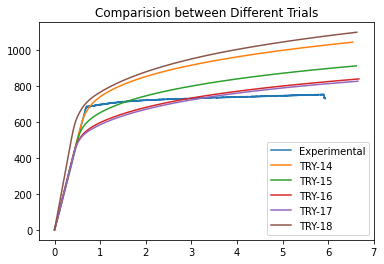

In [24]:
plt.plot(exp_data['TrueStrain_%'].to_list(), exp_data["TrueStress_MPa"].to_list(), label="Experimental")
# plt.plot(simulated_data["Strain_%"], simulated_data["Stress_MPa"], label="TRY-02")
for i in range(14, all_tries + 1):
    str_stub = f"TRY-{i:02}_"
    x_col_name, y_col_name = f"{str_stub}Strain", f"{str_stub}Stress"
    plt.plot(simulated_data[x_col_name].to_list(), simulated_data[y_col_name].to_list(), label=f"{str_stub[:-1]}")
plt.title("Comparision between Different Trials")
plt.legend(loc="best")
plt.savefig("ComparisionFig.png", bbox_inches="tight", dpi=256 )